# 군집

분류와 달리 정답 레이블이 없는 문제

- 분류 : KNN
- 군집 : K-Means

데이터를 몇 개의 묶을으로 나눌것인지를 하이퍼파라미터로 결졍하며, 이 값이 k-means의 k가 된다

라벨링을 위해 사용하기도 함.
## #01. 패키지 참조

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## #02. 데이터 가져오기 

** 게임 유저 군집화 ** 
게임 이용시간과 레벨을 활용하여 4개의 군집으로 나누기

1. 오래해서 잘하는 경우
2. 오래했는데도 못하는 경우
3. 잠깐했는데 잘하는 경우
4. 잠깐했는데 못하는 경우

In [2]:
origin = pd.read_excel('https://data.hossam.kr/G02/game_usage.xlsx')
origin

,time spent,game level
0,39,944
1,55,705
2,29,757
3,59,999
4,7,109
...,...,...
95,47,939
96,50,485
97,13,916
98,79,235


## #03. 데이터 살펴보기

### 게임이용자의 분포확인 (산점도 그래프)


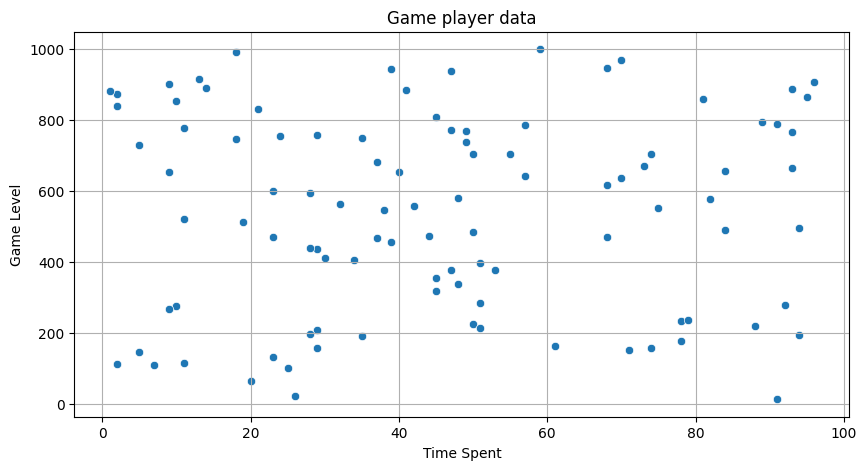

In [5]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=origin,x='time spent',y='game level')
plt.title('Game player data')
plt.xlabel('Time Spent')
plt.ylabel('Game Level')
plt.grid()
plt.show()
plt.close()

## #04. 군집화 모델



In [14]:
kmeans = KMeans(n_clusters = 4,n_init=,random_state=24)
kmeans.fit(origin)
labels = kmeans.predict(origin)
labels

array([1, 3, 3, 1, 2, 3, 0, 0, 2, 0, 1, 3, 2, 0, 1, 2, 3, 2, 1, 3, 3, 1,
       2, 3, 2, 1, 3, 2, 0, 0, 3, 3, 0, 2, 3, 3, 0, 2, 2, 1, 2, 3, 1, 3,
       1, 3, 3, 0, 3, 2, 0, 2, 2, 2, 0, 1, 2, 3, 1, 0, 2, 3, 0, 0, 0, 3,
       0, 2, 0, 3, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 3, 0, 1, 2, 0, 3, 0,
       2, 2, 3, 3, 0, 3, 1, 1, 0, 1, 2, 0])

In [15]:
df = origin.copy()
df['label'] = labels
df

,time spent,game level,label
0,39,944,1
1,55,705,3
2,29,757,3
3,59,999,1
4,7,109,2
...,...,...,...
95,47,939,1
96,50,485,0
97,13,916,1
98,79,235,2


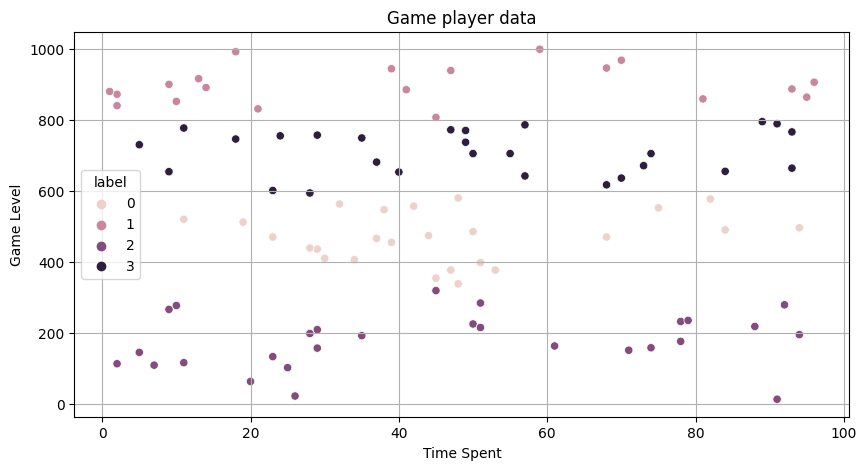

In [17]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df,x='time spent',y='game level',hue='label')
plt.title('Game player data')
plt.xlabel('Time Spent')
plt.ylabel('Game Level')
plt.grid()
plt.show()
plt.close()

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
n_data = scaler.fit_transform(origin)
n_data



array([[0.4       , 0.94421907],
       [0.56842105, 0.70182556],
       [0.29473684, 0.75456389],
       [0.61052632, 1.        ],
       [0.06315789, 0.09736308],
       [0.35789474, 0.7464503 ],
       [0.10526316, 0.51419878],
       [0.30526316, 0.40263692],
       [0.51578947, 0.21501014],
       [0.23157895, 0.46348884],
       [0.17894737, 0.99290061],
       [0.76842105, 0.70182556],
       [0.29473684, 0.19878296],
       [0.43157895, 0.55172414],
       [0.70526316, 0.94624746],
       [0.35789474, 0.18154158],
       [0.92631579, 0.79310345],
       [0.28421053, 0.18762677],
       [0.13684211, 0.89046653],
       [0.28421053, 0.58924949],
       [0.70526316, 0.61257606],
       [1.        , 0.90567951],
       [0.76842105, 0.14705882],
       [0.75789474, 0.6673428 ],
       [0.2       , 0.05070994],
       [0.01052632, 0.87119675],
       [0.37894737, 0.67748479],
       [0.26315789, 0.00912779],
       [0.46315789, 0.34584178],
       [0.49473684, 0.57505071],
       [0.

In [22]:
kmeans = KMeans(n_clusters = 4,n_init=10,random_state=24)
kmeans.fit(n_data)
labels = kmeans.predict(n_data)
labels

array([1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 1, 2, 2,
       3, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2,
       2, 1, 1, 0, 2, 3, 0, 3, 3, 0, 3, 1, 0, 1, 2, 3, 3, 1, 2, 1, 1, 1,
       0, 3, 0, 1, 1, 3, 0, 0, 2, 3, 1, 1, 0, 1, 0, 2, 0, 1, 3, 2, 1, 0,
       0, 3, 1, 2, 0, 1, 2, 1, 0, 1, 3, 0])

In [23]:
df = pd.DataFrame(n_data,columns=['time_spent','game_level'])
df['label'] = labels
df.head()

,time_spent,game_level,label
0,0.400000,0.944219,1
1,0.568421,0.701826,2
2,0.294737,0.754564,1
3,0.610526,1.000000,2
4,0.063158,0.097363,0


### 군집결과 시각화

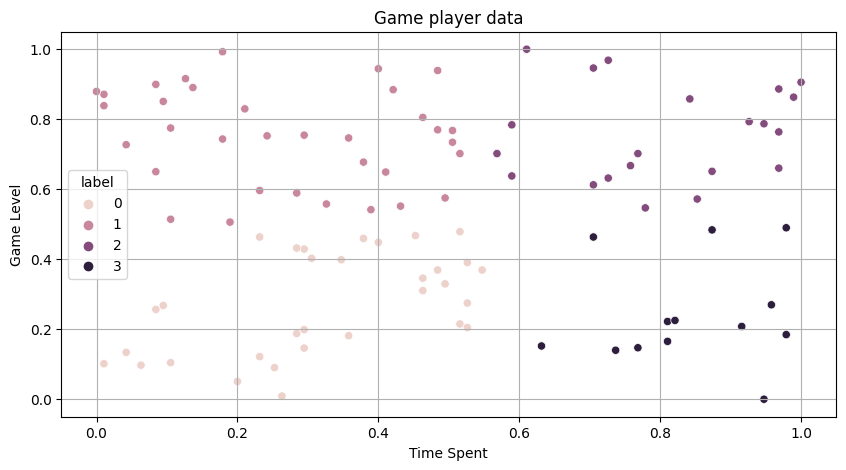

In [24]:
plt.figure(figsize=(10,5))
sb.scatterplot(data=df,x='time_spent',y='game_level',hue='label')
plt.title('Game player data')
plt.xlabel('Time Spent')
plt.ylabel('Game Level')
plt.grid()
plt.show()
plt.close()

## #06. 군집의 평가

#### Inertia
K-means 클러스터링의 성능지표

클러스터 내 데이터 포인트와 해당 클러스터의 중심 간의 거리의 합으로, 이 값이 작을수록 좋은 클러스터링 결과를 나타냅니다. 이너셔는 K-Means 알고리즘을 실행한 후에 확인할 수 있습니다.



In [25]:
kmeans = KMeans(n_clusters=4, random_state=324)
kmeans.fit(n_data)
kmeans.inertia_

4.234095248540369

In [26]:
iner = []
for k in range(2,11) :
    kmeans = KMeans(n_clusters=k,random_state=32)
    kmeans.fit(n_data)
    iner.append(kmeans.inertia_)
iner

[10.150300754112475,
 6.184585862746712,
 4.265103920618719,
 3.137939750355729,
 2.2346981066519063,
 1.8141504615008557,
 1.4848869726921106,
 1.3255819658728627,
 1.181415157056301]

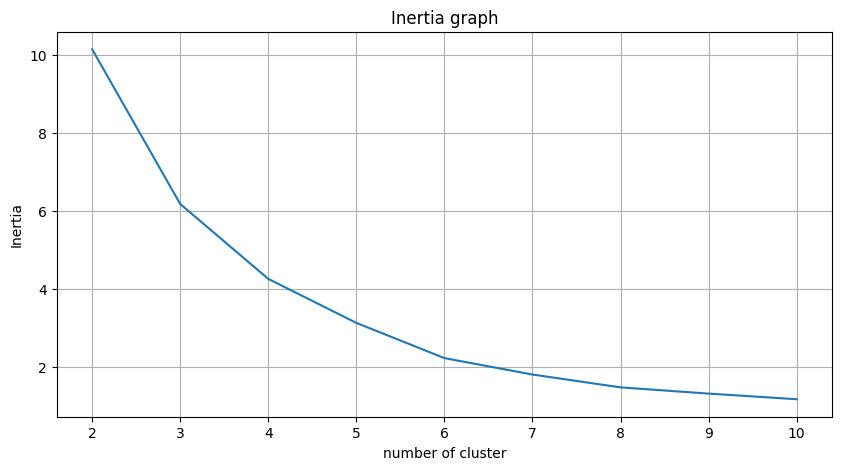

In [27]:
plt.figure(figsize=(10,5))
sb.lineplot(x=range(2,11),y=iner,markers='o')
plt.title('Inertia graph')
plt.xlabel('number of cluster')
plt.ylabel('Inertia')
plt.grid()
plt.show()
plt.close()

> 꺾이는 부분이 분류 가능한 지점인데, 가장 좋은것은 많이 꺾이는 부분이 최적 k갯수인데, 저기서는 3이랑 4가 애매한거같음. 그래서 꺾이는 부분만 모아서 재시각화해서 확연히 꺾이는 부분을 찾아서 최적의 k를 찾아야한다.

### 실루엣 계수

각 군집간의 거리가 얼마나 효율적으로 분리되었는지를 나타내는 지표

효율적 분리라 함은 군간거리는 크고 군내거리는 작은것임

sklearn에서는 silhouette_score()으로 제공하고

실루엣 계수는 -1~1 범위를 가지고 1에 가까울수록 좋은 군집으로 본다

0은 클러스터가 겹치는것, 음수값은 샘플이 잘못된 클러스터에 할당되었음을 의미


In [30]:
from sklearn.metrics import silhouette_score

In [31]:
kmeans = KMeans(n_clusters=4,random_state=877)
kmeans.fit(n_data)
y_pred = kmeans.predict(n_data)
score= silhouette_score(n_data,y_pred)

print('실루엣 점수 : ',score)

실루엣 점수 :  0.4072289634569363


In [33]:
score_list = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=777)
    kmeans.fit(n_data)
    y_pred = kmeans.predict(n_data)
    score = silhouette_score(n_data, y_pred)
    score_list.append(score)
score_list


[0.3617202800675718,
 0.39473417105934466,
 0.4144891907182965,
 0.4318795903949567,
 0.46544130770511294,
 0.4581607045900181,
 0.46061321951846396,
 0.46297169733084376,
 0.4313333259160698]

#### 실루엣 점수 시각화

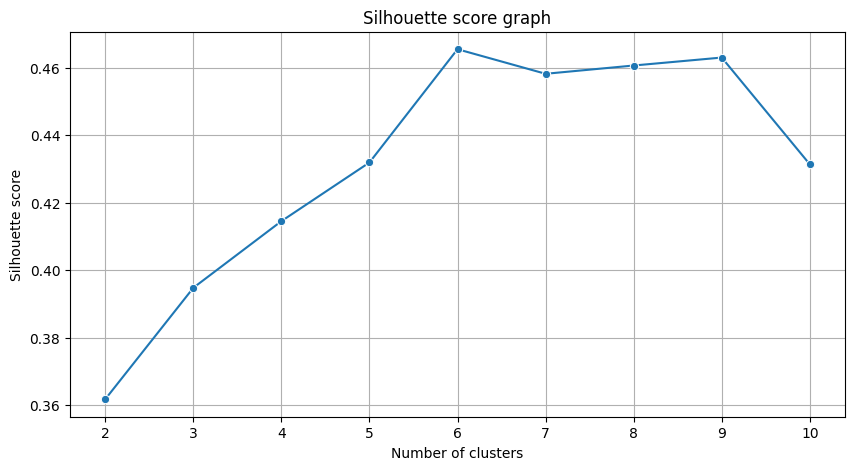

In [34]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=range(2, 11), y=score_list, marker='o')
plt.title("Silhouette score graph")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()
plt.close()